In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 1

See attatched notes for this problem 

## Problem 2 

Using the guassian approximation form of the Poisson that we proved in problem one, we can adjust $\lambda$ to explore how large it needs to be such that the two functions are "good enough"(within a factor of 2 agreement) at 5$\sigma$ and 3$\sigma$ respectively. 

Condition achieved for 5 sigma, lambda: 564
number of points: 683.0


<ipython-input-328-92d14b277392>:6: RuntimeWarning: invalid value encountered in power
  return ((lam/x)**x) * np.exp(x-lam) * (1/np.sqrt(2*np.pi*x))
<ipython-input-328-92d14b277392>:6: RuntimeWarning: invalid value encountered in sqrt
  return ((lam/x)**x) * np.exp(x-lam) * (1/np.sqrt(2*np.pi*x))


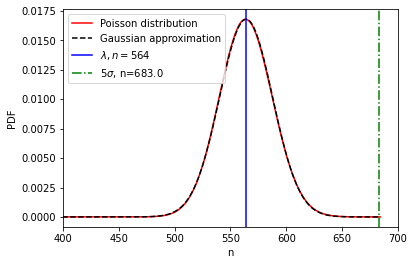

Condition achieved for 3 sigma, lambda: 7
number of points: 15.0


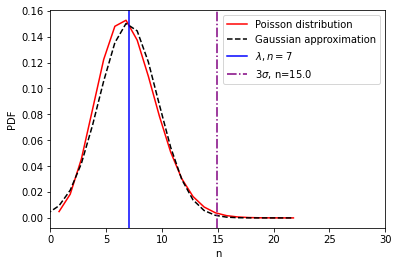

In [328]:
# define a range of means
lam = np.arange(1,700) 

# poisson function re-written with the Stirling approximation for the factorial
# Stirling approximation used: x! ~ x^x e^-x sqrt(2pix)
def poi(lam,x):
    return ((lam/x)**x) * np.exp(x-lam) * (1/np.sqrt(2*np.pi*x))

# gaussian approximation
def gauss_apprx(lam,x):
    top = np.exp(-((x-lam)**2)/(2*lam))
    bot = np.sqrt(2*np.pi*lam)
    return (top/bot)

# loop through to find number of points for 5sig
for i in lam:
    
    # 5 sigma occurs at the mean plus 5sigma where sigma^2 = lambda due to our approximation
    n_five = i+(5*np.sqrt(i))
    x = np.arange(-n_five-2,n_five+2)
    
    # Find the index in the array which is closest to 5sig
    difference_array = np.absolute(x-n_five)
    index = difference_array.argmin()
    
    # Define the value of the functions at that point
    y_p = poi(i,x[index])
    y_g = gauss_apprx(i,x[index])
    
    # take the ratio 
    ratio = float(y_p / y_g)
    
    # Stop the loop once it finds that the ratio is within a factor of 2 
    # the way I defined ratio it will get smaller until it is below 2 first 
    # at a much larger number of points, the ratio will dip below 0.5 
    
    if (0.5 <= ratio <= 2) is True:
        print('Condition achieved for 5 sigma, lambda:',i)
        print('number of points:',round(n_five))
        
        plt.plot(x,poi(i,x),color ='red',label='Poisson distribution')
        plt.plot(x,gauss_apprx(i,x),color='k',linestyle='--',label='Gaussian approximation')
        plt.axvline(x = i, color = 'b',label=f'$\lambda,n={i}$')
        plt.axvline(x = n_five, color = 'g',linestyle='-.',label=f'$5\sigma$, n={round(n_five)}')
        plt.xlim(400,700)
        plt.legend()
        plt.ylabel('PDF')
        plt.xlabel('n')
        plt.show()
        break


# repeat same thing for 3sig 
for i in lam:
    
    n_three = i+(3*np.sqrt(i))
    n_five = i+(5*np.sqrt(i))
    x = np.arange(-n_five-2,n_five+2)
    
    difference_array = np.absolute(x-n_three)
    index = difference_array.argmin()
    
    y_p = poi(i,x[index])
    y_g = gauss_apprx(i,x[index])
    
    ratio = float(y_p / y_g)
    
    if (0.5 <= ratio <= 2) is True:
        print('Condition achieved for 3 sigma, lambda:',i)
        print('number of points:',round(n_three))
        plt.plot(x,poi(i,x),color ='red',label='Poisson distribution')
        plt.plot(x,gauss_apprx(i,x),color='k',linestyle='--',label='Gaussian approximation')
        plt.axvline(x = i, color = 'b',label=f'$\lambda, n={i}$')
        plt.axvline(x = n_three, color = 'purple',linestyle='-.',label=f'$3\sigma$, n={round(n_three)}')
        plt.xlim(0,30)
        plt.ylabel('PDF')
        plt.xlabel('n')
        plt.legend()
        plt.show()
        break
        
    
    

## Problem 3 

See attatched notes for this problem.

## Problem 4 

In [516]:
m =[]
var =[]

for _ in range(10000):
    x=np.linspace(-5,5,51) 
    n = len(x)

    amp_true = 1.0 

    # this is the guassian "template" signal
    A = np.exp(-0.5*(x)**2)

    # add some gaussian noise
    signal_n = A*amp_true+np.random.randn(n)

    # make N^-1
    Ninv = np.eye(n)*(1/(np.std(signal_n)**2))

    # solve m = (A.T Ninv A)^-1 (A.T Ninv d)
    denom = np.dot(A.T,Ninv@A) 
    rhs = np.dot(A.T,Ninv@signal_n)     
    
    # save the amplitude for each chunk from the model
    m.append(rhs/denom)
    
    # save the variance on the amplitude from each model 
    # where the variance is equal to (A.T Ninv A)^-1
    var.append(1/denom)

m = np.array(m)
err = np.array(err)

# Non weighted mean
nw_mean = np.mean(m-amp_true)
print('mean of one chunk: {:.5f}'.format(np.mean(m)))
print('Bias of single chunk: {:.2f}%'.format(nw_mean*100))
print( )

# weighted mean (weight each amplitude by its variance)
wt_mean = np.sum((1/(err))*m)/ np.sum((1/(err))) -1
print('Weighted mean of 10,000 chunks: {:.5f}'.format(wt_mean+1))
print('Bias of 10,000 chunks: {:.2f}%'.format(wt_mean*100))


mean of one chunk: 1.00177
Bias of single chunk: 0.18%

Weighted mean of 10,000 chunks: 0.97934
Bias of 10,000 chunks: -2.07%


We can see above that the single chunks are much less biased than 10,000 chunks. I also get the result that the data is being underbiased by about 2% once enough chunks are added. One way to mitigate the bias is to subtract the model from the data before estimating the noise and then fit the data. 

## Problem 5 

See attatched notes for this problem.